In [4]:
import pandas as pd
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import numpy as np



names=['0', '1', '2', '3', '4','5','6','7','8','9','10']
dataset = pd.read_csv("magic04.data",header=0, names=names) #读取csv数据
# print(dataset)
# print(dataset.describe())
dataset
data=dataset[names[:-1]]
data

,0,1,2,3,4,5,6,7,8,9
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


array([ 53.25015393,  22.18096622,   2.82501696,   0.38032707,
         0.21465713,  -4.33174516,  10.54554482,   0.24972596,
        27.64570668, 193.81802647])

array([[ 3973.49360177,  4745.96701765,  2248.03224613, ...,
         4846.35035653,  7935.63989139,  5128.45896296],
       [ 4745.96701765, 10580.97364716,  3162.64152849, ...,
         6176.00353497, 12901.07140578,  9389.93265368],
       [ 2248.03224613,  3162.64152849,  1342.63308859, ...,
         2703.94298205,  4860.64839684,  3214.20348159],
       ...,
       [ 4846.35035653,  6176.00353497,  2703.94298205, ...,
         6395.97517425, 10346.63306902,  7880.87014123],
       [ 7935.63989139, 12901.07140578,  4860.64839684, ...,
        10346.63306902, 19746.25985233, 15634.46822326],
       [ 5128.45896296,  9389.93265368,  3214.20348159, ...,
         7880.87014123, 15634.46822326, 18350.5052724 ]])

array([ 4745.96701765, 10580.97364716,  3162.64152849, ...,
        6176.00353497, 12901.07140578,  9389.93265368])

In [31]:
class CCovMat(object):
    '''计算多维度样本集的协方差矩阵
    '''
    def __init__(self, samples):
        #样本集shpae=(m,n)，m是样本总数，n是样本的特征个数
        self.samples = samples
        self.covmat1 = [] #保存方法1求得的协方差矩阵
        self.covmat2 = [] #保存方法2求得的协方差矩阵
        
        #用方法1计算协方差矩阵
        self._calc_covmat1()
        #用方法2计算协方差矩阵
        self._calc_covmat2()
        
    def _covariance(self, X, Y):
        '''
        计算两个等长向量的协方差convariance
        '''
        n = np.shape(X)[0]
        X, Y = np.array(X), np.array(Y)
        meanX, meanY = np.mean(X), np.mean(Y)
        #按照协方差公式计算协方差，Note:分母一定是n-1
        cov = sum(np.multiply(X-meanX, Y-meanY))/(n-1)
        return cov
        
    def _calc_covmat1(self):
        '''
        方法1：根据协方差公式和协方差矩阵的概念计算协方差矩阵
        '''
        S = self.samples #样本集
        na = np.shape(S)[1] #特征attr总数
        self.covmat1 = np.full((na, na), fill_value=0.) #保存协方差矩阵
        for i in range(na):
            for j in range(na):
                self.covmat1[i,j] = self._covariance(S[:,i], S[:,j])
        return self.covmat1
        
    def _calc_covmat2(self):
        '''
        方法2：先样本集中心化再求协方差矩阵
        '''
        S = self.samples #样本集
        ns = np.shape(S)[0] #样例总数
        mean = np.array([np.mean(attr) for attr in S.T]) #样本集的特征均值
        print('Q1：multivariate mean vector. :\n',mean)
        centrS = S - mean ##样本集的中心化
        print('样本集的中心化(每个元素将去当前维度特征的均值):\n', centrS)
        
        #求协方差矩阵
        self.covmat2 = np.dot(centrS.T, centrS)/(ns - 1)
        return self.covmat2
        
    def CovMat1(self):
        return self.covmat1
        
    def CovMat2(self):
        return self.covmat2
        
if __name__=='__main__':
    
    samples = np.array(data)
    cm = CCovMat(samples)
    
    print('样本集:\n', samples)
    print('Q2：Compute the sample covariance matrix as inner products between the columns of the centered data matrix.:\n', cm.CovMat1())
    print('Q3: Compute the sample covariance matrix as outer product between the centered data points. :\n', cm.CovMat1())


Q1：Compute the multivariate mean vector. :
 [ 53.25143967  22.1812911    2.82502643   0.38032647   0.214658
  -4.33342938  10.54494197   0.25017038  27.64505226 193.82391191]
样本集的中心化(每个元素将去当前维度特征的均值):
 [[-21.64783967 -10.4577911   -0.30652643 ... -10.20757038 -21.28415226
   11.43708809]
 [108.80056033 113.8497089    1.23617357 ... -45.46617038  49.31494774
   62.96408809]
 [-29.43423967 -12.6084911   -0.48652643 ...  -7.40147038 -17.19605226
  -77.08691191]
 ...
 [ 22.19406033  25.3492089    0.62327357 ...  -9.71637038   2.65364774
   62.69268809]
 [ 67.26206033  54.7205089    1.16887357 ... -64.08907038  57.04234774
  214.49268809]
 [133.92996033  30.8201089    0.38427357 ...  31.22532962  25.08594774
   78.49348809]]
样本集:
 [[ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 [ 23.8172   9.5728   2.3385 ...  -7.1513  10.449  116.737 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.

In [34]:
#中心化后计算相关系数
import pandas as pd
S = data #样本集

mean = np.array([np.mean(S) ]) #样本集的特征均值
centrS = S - mean ##样本集的中心化
#print(data.corr()) # 任意两列的相关系数，相关系数矩阵 
#print(data.corr()[u'0']) #只显示“0”与其他属性的相关系数
print('Q4: \n',centrS[u'0'].corr(centrS[u'1'])) #计算“0”与“1”的相关系数


Q4: 
 0.77051086473012


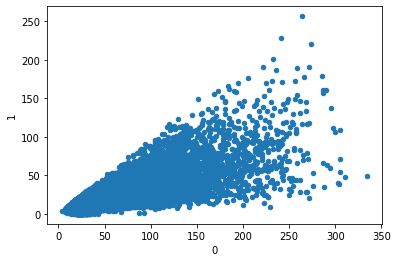

In [14]:
#0和1绘制散点图

x='0'
y='1'

#绘制散点图
dataset.plot(x, y, kind='scatter')

D:\Program Files (x86)\Anaconda\anzhuang\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


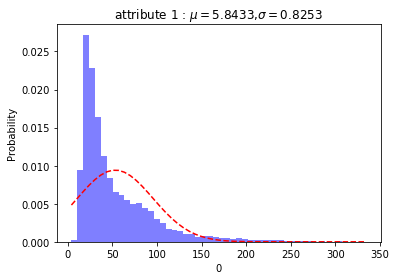

In [20]:
#0的概率密度函数

x = data.iloc[:,0] #提取第一列的sepal-length变量 
mu =np.mean(x) #计算均值 
sigma =np.std(x) 
mu,sigma

num_bins = 50 #直方图柱子的数量 
n, bins, patches = plt.hist(x, num_bins,normed=1, facecolor='blue', alpha=0.5) 
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 


y=norm.pdf(bins,mu,sigma)

plt.plot(bins, y, 'r--') #绘制y的曲线 
plt.xlabel('0') #绘制x轴 
plt.ylabel('Probability') #绘制y轴 
plt.title(r'attribute 1 : $\mu=5.8433$,$\sigma=0.8253$')
plt.subplots_adjust(left=0.15)#左边距 
plt.show()



In [22]:
#计算矩阵各列的方差。
import numpy as np
np.var(data, axis = 0) # 计算矩阵每一列的方差
#4方差最小，9方差最大

0    1794.749492
1     336.575774
2       0.223348
3       0.033421
4       0.012213
5    3505.303824
6    2601.005125
7     433.778456
8     681.390858
9    5584.181160
dtype: float64

In [35]:
#计算各列之间的协方差
result = []
for i in range(len(data.columns)):
    for j in range(i+1, len(data.columns)):
        result.append(data[data.columns[i]].cov(data[data.columns[j]]))

print('max = ', max(result))
print('min = ', min(result))

max =  1324.789860039695
min =  -924.4415220690067
